#Assignment 4
#Saumya Gupta 204073004
Video link: https://drive.google.com/file/d/1_2jRdUKJl2M3FF4zXL5dxtmpRH-OXxvC/view?usp=sharing

# We do not have any target variable to predict, hence called unsupervised learning.we only have the independent variables and no target/dependent variable.

In clustering, we do not have a target to predict. We look at the data, try to club similar observations, and form different groups. Hence it is an unsupervised learning problem.

# Import libraries and upload files

In [1]:
# Import common libraries for data processing and ML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

**Upload credit card data**

In [2]:
from google.colab import files # Colab-specific library to load files

uploaded = files.upload() # Upload file; here we will upload data
# Confirm upload
for fn in uploaded.keys():
  print('You uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Customer-Data - 2.csv to Customer-Data - 2.csv
You uploaded file "Customer-Data - 2.csv" with length 902879 bytes


**Reading Customer-Data - 2.csv using pandas and display few table points**

usage behavior of about 9000 active credit cardholders during the last six months

In [3]:
# Display header and a few rows of data
customer_credit_card_data = pd.read_csv('Customer-Data - 2.csv')
display(customer_credit_card_data)


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

# **Q1 a and b: Performing EDA on customer data file*

Printing all information about the data, including no. of entries , data type , number of unique values and unique value entries, number of null entries

In [4]:
customer_credit_card_data .info()
#print(LAHD_df.dtypes) # Data types
#LAHD_df.nunique()
#LAHD_df.isnull().sum()
#(LAHD_df.isnull().sum()/(len(LAHD_df)))*100
for col in customer_credit_card_data .columns.values: # For each column
  list_vals = pd.unique(customer_credit_card_data [col])    # Create a list of unique values
  print(col + ' is of type ' + str(customer_credit_card_data [col].dtypes) + ', has ' + str(len(list_vals)) + ' unique values, and ' + str(np.sum(pd.isnull(customer_credit_card_data [col]))) + ' null entries')
  if len(list_vals) < 10: # If the column has less than 10 unique values then print them
    list_str = ''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print('  These are: '+list_str[0:len(list_str)-2])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

observation:
only credit limit with 1 null entry,and minimum payments with 313 null entries

*CUSTID: Identification of Credit Cardholder (Categorical)
*BALANCE: Balance amount left in their account to make purchases
*BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
*PURCHASES: Amount of purchases made from the account
*ONEOFFPURCHASES: Maximum purchase amount did in one-go
*INSTALLMENTSPURCHASES: Amount of purchase done in installment
*CASH ADVANCE: Cash in advance given by the user
*PURCHASESFREQUENCY: How frequently the Purchases are being made score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
*ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
*PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
*CASHADVANCEFREQUENCY: How frequently the cash in advance being paid
*CASHADVANCETRX: Number of Transactions made with “Cash in Advanced”
*PURCHASESTRX: Number of purchase transactions made
*CREDIT LIMIT: Limit of Credit Card for user
*PAYMENTS: Amount of Payment done by the user
*MINIMUM_PAYMENTS: Minimum amount of payments made by the user
*PRCFULLPAYMENT: Percent of full payment paid by the user
*TENURE: Tenure of credit card service for user

We drop the null entries and again display the information to make sure there are 0 null entries for all columns

In [5]:
# Separate MINIMUM_PAYMENTS column
minimum_payments = customer_credit_card_data[['MINIMUM_PAYMENTS']]

# Drop rows with missing values in all other columns
data_without_minimum_payments = customer_credit_card_data.drop(columns=['MINIMUM_PAYMENTS']).dropna()

# Combine back with MINIMUM_PAYMENTS
customer_credit_card_data = data_without_minimum_payments.join(minimum_payments)

# Print the result to confirm no missing values except for MINIMUM_PAYMENTS
print(customer_credit_card_data.isnull().sum())


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
PRC_FULL_PAYMENT                      0
TENURE                                0
MINIMUM_PAYMENTS                    313
dtype: int64


In [6]:
customer_credit_card_data = customer_credit_card_data.dropna(subset=['MINIMUM_PAYMENTS'])
customer_credit_card_data.info()


for col in customer_credit_card_data.columns.values: # For each column
  list_vals = pd.unique(customer_credit_card_data[col])    # Create a list of unique values
  print(col + ' is of type ' + str(customer_credit_card_data[col].dtypes) + ', has ' + str(len(list_vals)) + ' unique values, and ' + str(np.sum(pd.isnull(customer_credit_card_data[col]))) + ' null entries')
  if len(list_vals) < 10: # If the column has less than 10 unique values then print them
    list_str = ''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print('  These are: '+list_str[0:len(list_str)-2])

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

In [7]:
# Select numerical columns for clustering
features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
            'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
            'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
            'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
            'PRC_FULL_PAYMENT']

# Extract selected features
X = customer_credit_card_data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Q2) a,c ,d

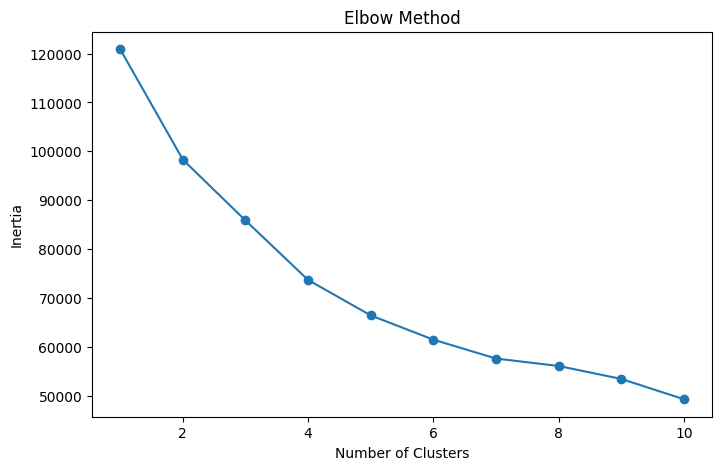

In [8]:
# Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [10]:
#  optimal number of clusters based on the Elbow Method
optimal_k = 4  # Example value;based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_credit_card_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Check cluster assignments
print(customer_credit_card_data['Cluster'].value_counts())


Cluster
1    3859
3    3400
0    1018
2     359
Name: count, dtype: int64


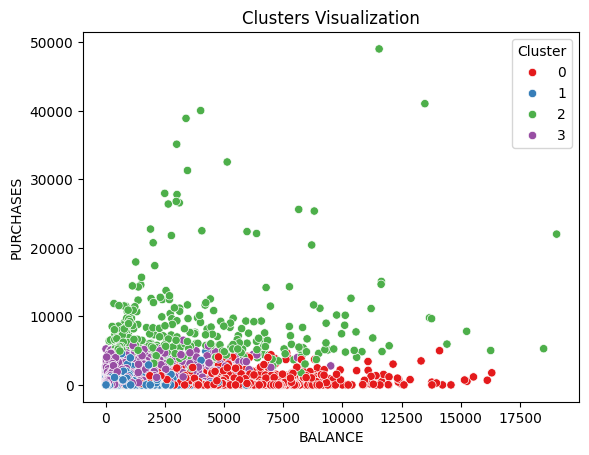

In [11]:
sns.scatterplot(x=customer_credit_card_data['BALANCE'], y=customer_credit_card_data['PURCHASES'], hue=customer_credit_card_data['Cluster'], palette='Set1')
plt.title('Clusters Visualization')
plt.show()


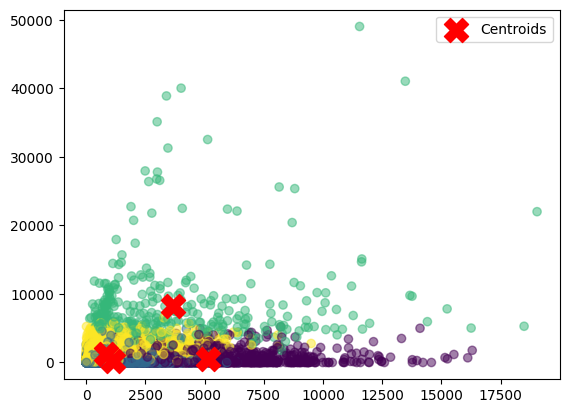

In [13]:
# Add centroids to the visualization
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(X['BALANCE'], X['PURCHASES'], c=customer_credit_card_data['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.legend()
plt.show()


In [15]:
# Group by clusters to summarize behaviors
cluster_summary = customer_credit_card_data.groupby('Cluster')[features].mean()
print(cluster_summary)


             BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
Cluster                                                                       
0        5140.556940   555.417868        340.443055              215.096297   
1        1130.533169   266.420977        210.678069               56.089777   
2        3686.335668  8206.603148       5467.274373             2741.000084   
3         855.579178  1269.394815        618.117535              651.460953   

         CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
Cluster                                                                  
0         4849.428561             0.312503                    0.142525   
1          684.106177             0.166758                    0.089829   
2          784.417266             0.946615                    0.740521   
3          213.944120             0.877051                    0.300188   

         PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
Cluster    

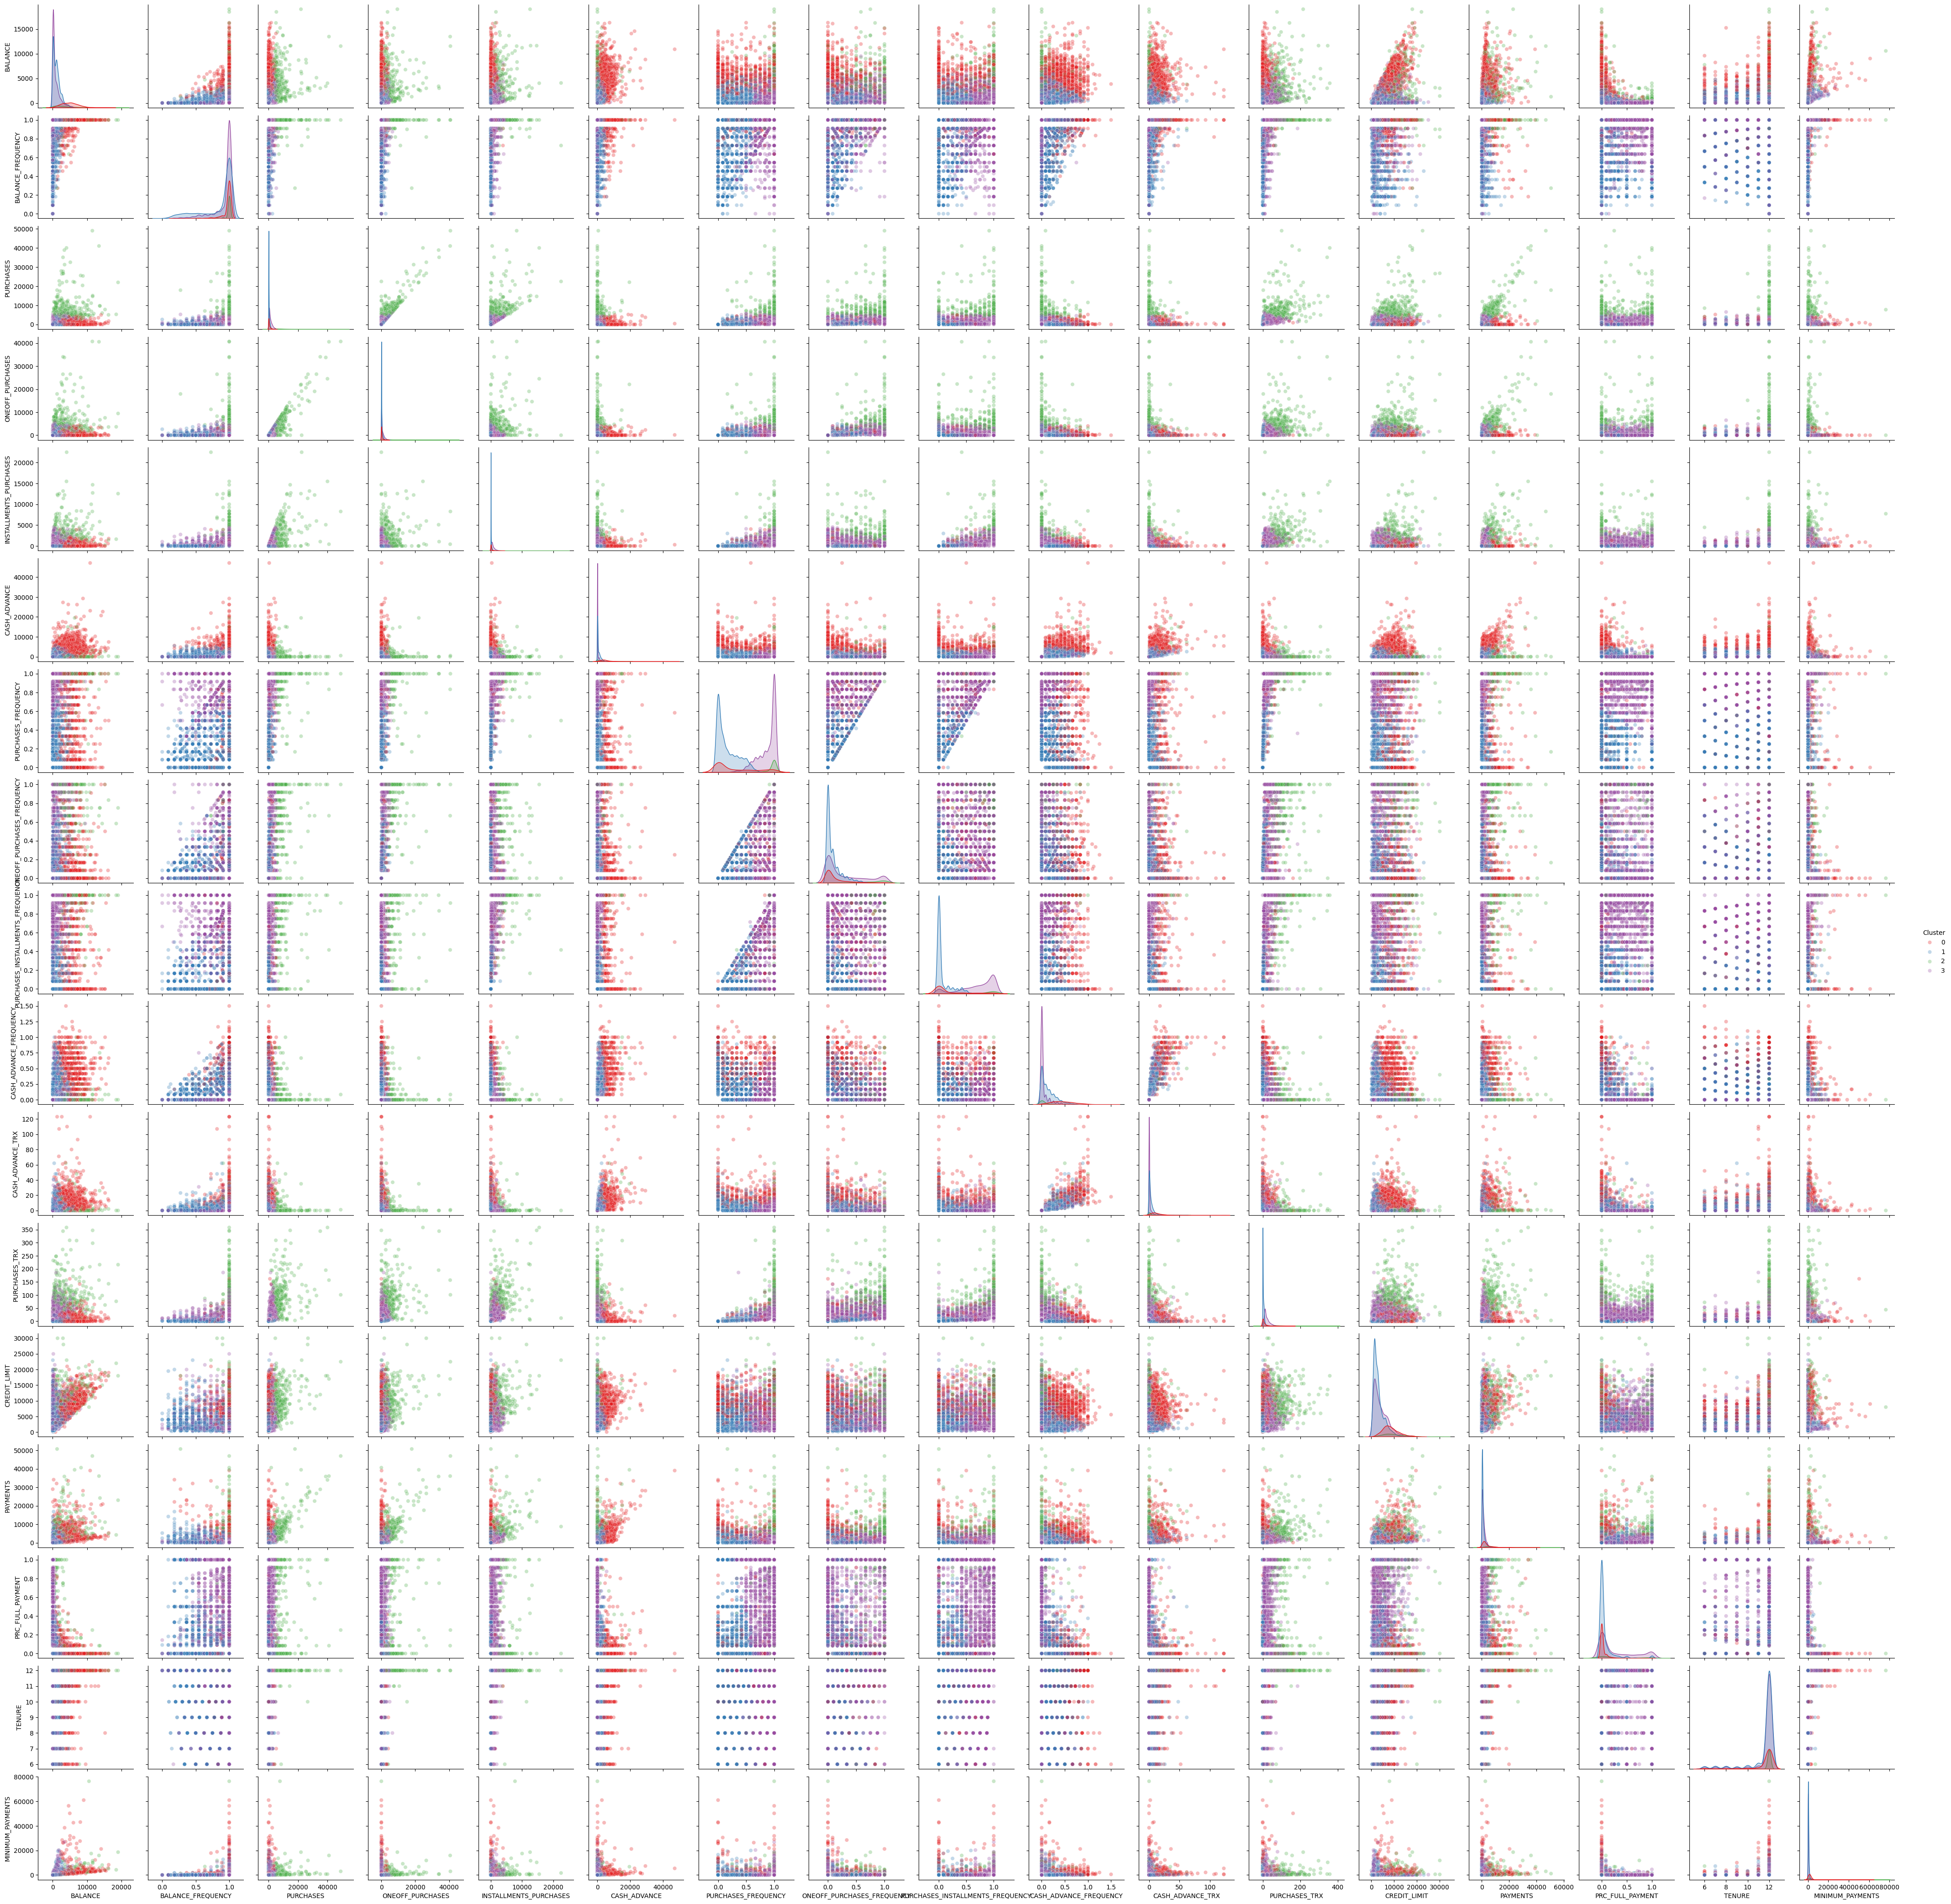

In [18]:

# Include all features + Cluster for pairwise plotting
sns.pairplot(
    customer_credit_card_data,
    hue='Cluster',
    diag_kind='kde',
    palette='Set1',
    plot_kws={'alpha': 0.3}
)
plt.show()


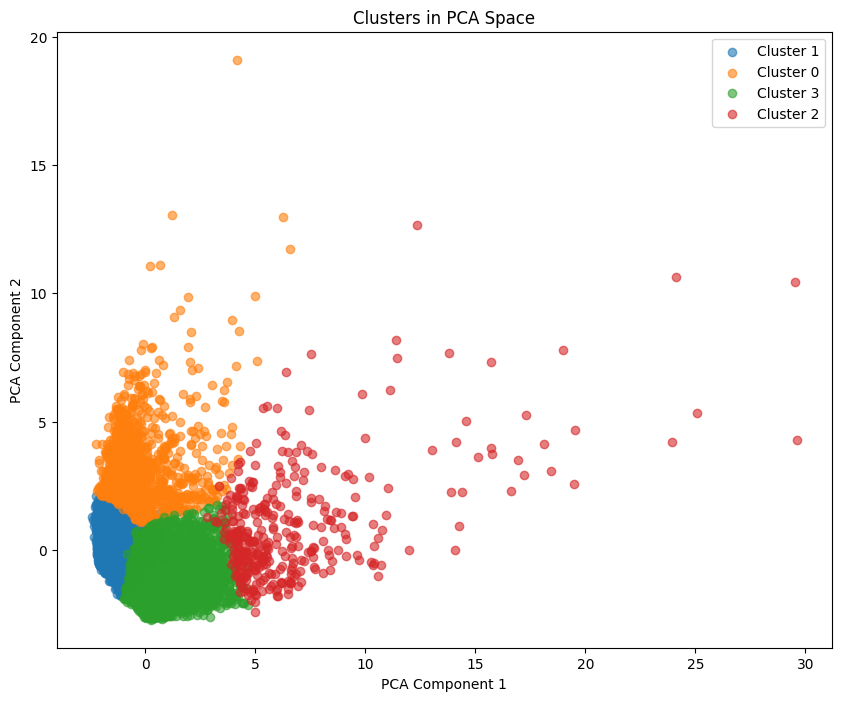

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters in PCA space
plt.figure(figsize=(10, 8))
for cluster in customer_credit_card_data['Cluster'].unique():
    cluster_data = X_pca[customer_credit_card_data['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters in PCA Space')
plt.legend()
plt.show()


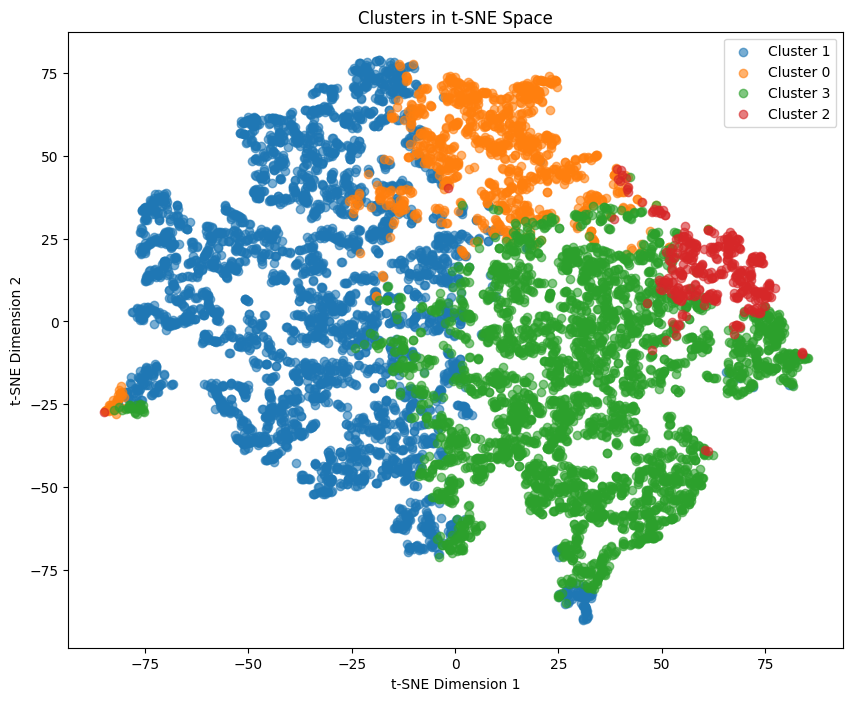

In [22]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot clusters in t-SNE space
plt.figure(figsize=(10, 8))
for cluster in customer_credit_card_data['Cluster'].unique():
    cluster_data = X_tsne[customer_credit_card_data['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.6)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clusters in t-SNE Space')
plt.legend()
plt.show()


In [25]:
# Define cluster names
cluster_names = {
    0: 'Reckless Spender',
    1: 'Careful Planner',
    2: 'Big Ticket Buyer',
    # Add more based on your analysis
}

# Map cluster names
customer_credit_card_data['Cluster_Name'] = customer_credit_card_data['Cluster'].map(cluster_names)

# Display data with cluster names
print(customer_credit_card_data[['CUST_ID', 'Cluster', 'Cluster_Name']])


     CUST_ID  Cluster      Cluster_Name
0     C10001        1   Careful Planner
1     C10002        0  Reckless Spender
2     C10003        3               NaN
4     C10005        1   Careful Planner
5     C10006        3               NaN
...      ...      ...               ...
8943  C19184        1   Careful Planner
8945  C19186        3               NaN
8947  C19188        3               NaN
8948  C19189        1   Careful Planner
8949  C19190        1   Careful Planner

[8636 rows x 3 columns]


# Q3 a,b,c

In [26]:
from sklearn.preprocessing import StandardScaler

# Drop unnecessary columns for PCA (like CUST_ID and cluster columns)
X = customer_credit_card_data.drop(['CUST_ID', 'Cluster', 'Cluster_Name'], axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


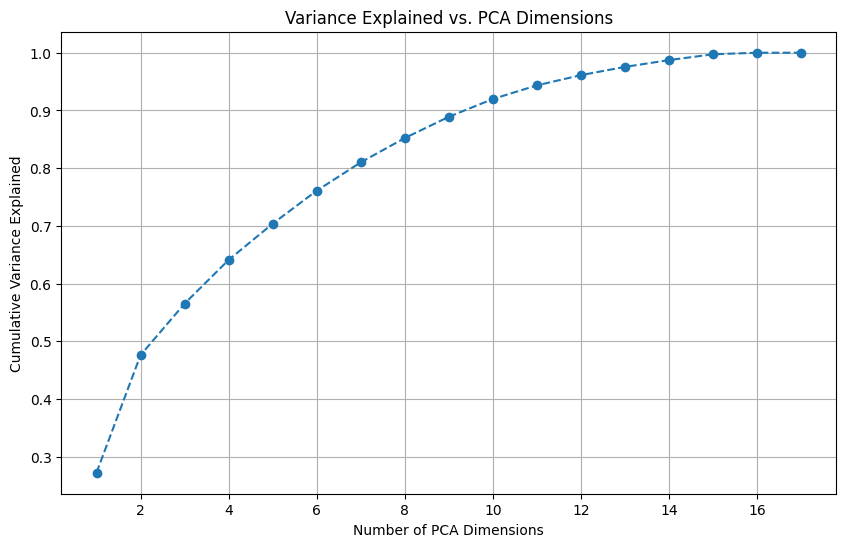

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Train PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of PCA Dimensions')
plt.ylabel('Cumulative Variance Explained')
plt.title('Variance Explained vs. PCA Dimensions')
plt.grid()
plt.show()


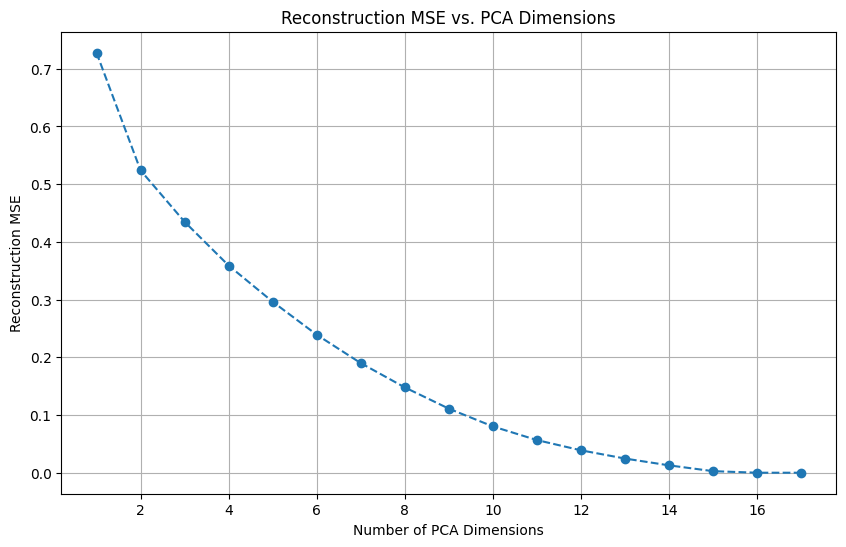

In [28]:
# Initialize a list to store MSE for various PCA dimensions
mse_list = []

# Loop over different numbers of components
for k in range(1, X_scaled.shape[1] + 1):
    # Use top k components
    pca_k = PCA(n_components=k)
    X_pca_k = pca_k.fit_transform(X_scaled)

    # Reconstruct the data
    X_reconstructed = pca_k.inverse_transform(X_pca_k)

    # Compute MSE
    mse = np.mean((X_scaled - X_reconstructed) ** 2)
    mse_list.append(mse)

# Plot MSE versus PCA dimensions
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mse_list) + 1), mse_list, marker='o', linestyle='--')
plt.xlabel('Number of PCA Dimensions')
plt.ylabel('Reconstruction MSE')
plt.title('Reconstruction MSE vs. PCA Dimensions')
plt.grid()
plt.show()


Reference:
1. chatgpt: how to do k means clustering for a given dataset
2. https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/


Thank you